In [1]:
import sys
sys.path.append('/home/hma000/accomatic-web/')
from acco import *

In [2]:
exp = read_exp('/home/hma000/accomatic-web/data/pickles/24May_0.5_0.pickle')
# df = exp.results.loc[idx[["res"], terr, szn, stat]].droplevel("mode")
idx = pd.IndexSlice
dat = exp.results.loc[idx[['res'], :, :, 'R']].droplevel("mode")
dat.apply(average_data)

era5      0.743
jra55     0.725
merra2    0.664
ens       0.752
dtype: float64

In [3]:
exp = read_exp('/home/hma000/accomatic-web/data/pickles/09May_0.1_0.pickle')
# df = exp.results.loc[idx[["res"], terr, szn, stat]].droplevel("mode")
idx = pd.IndexSlice
dat = exp.results.loc[idx[['res'], :, :, 'R']].droplevel("mode")
dat.apply(average_data)

era5      0.770
jra55     0.738
merra2    0.626
ens       0.785
dtype: float64

In [4]:
# dat = exp.obs.loc[idx[['res'], :, :, 'R']].droplevel("mode")
# Plot all twelve months of obs vs ens for one site, one year & Calculate R
# Plot twelve seperate months in different colours, each with thier own R value. 

test_site = 'YK16-RH01'
o = exp.obs(sitename=test_site).reset_index()
m = exp.mod(sitename=test_site).reset_index()

merged_df = pd.merge(o, m, left_on='index', right_on='time').drop(columns='time')
merged_df.set_index(pd.to_datetime(merged_df['index']), inplace=True)
merged_df.drop(columns='index', inplace=True)
merged_df = merged_df[merged_df.index.year == 2020][['obs','ens']]

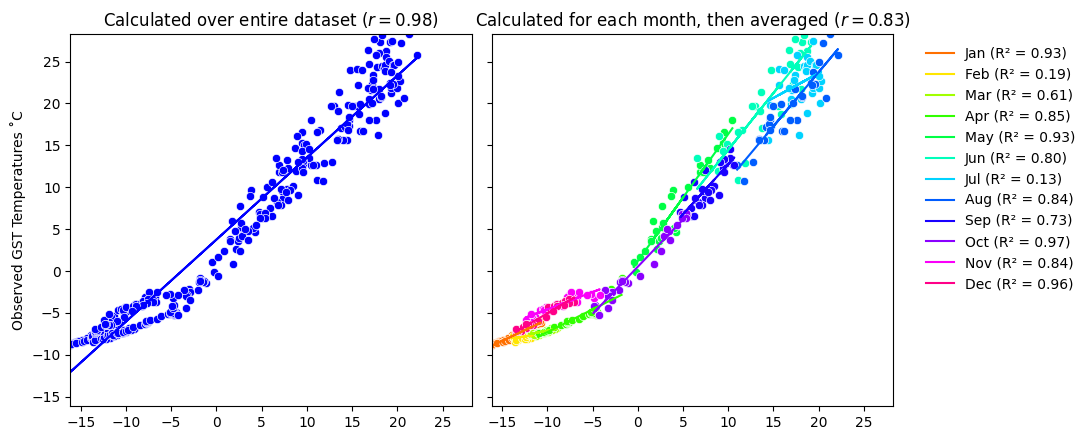

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr
from calendar import month_abbr
import statistics
# Assuming merged_df is already defined

# Function to plot linear regression line and R value
def plot_regression(ax, x, y, color, month=99):
    slope, intercept, r_value, _, _ = linregress(x, y)
    if month == 99: 
        month_abb = ''
    else: 
        month_abb = month_abbr[month]
        
    ax.plot(x, intercept + slope * x, label=f'{month_abb} (R² = {r_value**2:.2f})', color=color)

# Setup two subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), sharey=True)


# Plot 1: All data points with global linear regression line
sns.scatterplot(ax=axes[0], x=merged_df['ens'], y=merged_df['obs'], color='blue')
plot_regression(axes[0], merged_df['ens'], merged_df['obs'], color='blue')

pearson_corr = pearsonr(merged_df['ens'], merged_df['obs'])
axes[0].set_title(f'Calculated over entire dataset ($r = {pearson_corr[0]:.2f}$)')

r_month_list = []
# Plot 2: Color-coded by month with individual linear regressions
for month in range(1, 13):
    month_data = merged_df[merged_df.index.month == month]
    color = sns.color_palette('hsv', 12)[month - 1]
    sns.scatterplot(ax=axes[1], x=month_data['ens'], y=month_data['obs'], color=color)
    plot_regression(axes[1], month_data['ens'], month_data['obs'], color=color, month=month)
    r_month_list.append(pearsonr(month_data['ens'], month_data['obs'])[0])

r_month_list = statistics.mean(r_month_list)

axes[1].set_title(f'Calculated for each month, then averaged ($r = {r_month_list:.2f}$)')

# Set same xlim and ylim for both plots
common_lim = (merged_df[['ens', 'obs']].min().min(), merged_df[['ens', 'obs']].max().max())
axes[0].set_xlim(common_lim); axes[0].set_ylim(common_lim)
axes[1].set_xlim(common_lim); axes[1].set_ylim(common_lim)

# Clean up the legend in plot 2
handles, _ = axes[1].get_legend_handles_labels()

axes[1].legend(handles=handles, loc='best',bbox_to_anchor=(1.05, 1), frameon=False)
axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_ylabel('Observed GST Temperatures ˚C')

# Show the plots
plt.tight_layout()
plt.show()


In [3]:

from plotting.box import *
from plotting.heatmap import * 

gstpth = "/home/hma000/accomatic-web/data/pickles/09May_0.1_0.pickle"
with open(gstpth, "rb") as f_gst:
    gst = pickle.load(f_gst)

pth = "/home/hma000/accomatic-web/data/pickles/24May_0.5_0.pickle"
with open(pth, "rb") as f_50:
    exp50 = pickle.load(f_50)

Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...
Generating rank distribution...


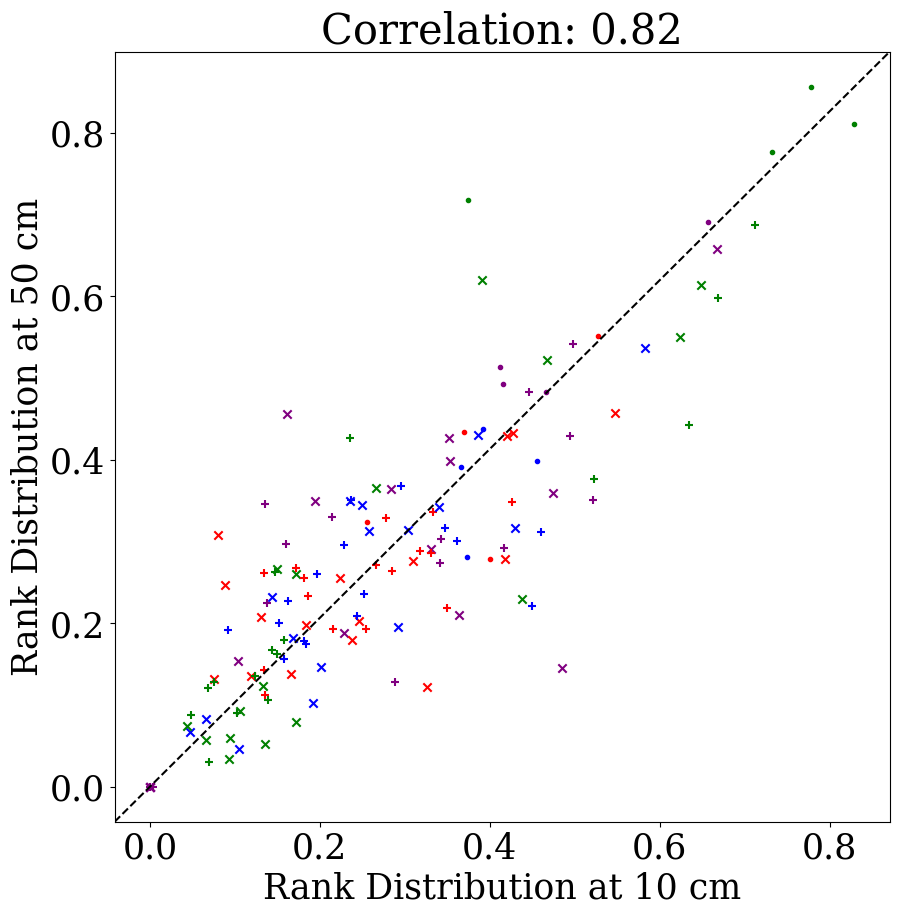

In [9]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

color_map = {'era5': 'red', 'jra55': 'blue', 'merra2': 'green', 'ens': 'purple'}
pearson_coefficients = []

# Create the scatter plot
plt.figure(figsize=(10,10))

for t in set(exp50.terr_list):
    for s, mark in zip(set(exp50.stat_list), ['.','x','+']):
        a = rank_distribution(gst, stat=s, terr=t)
        b = rank_distribution(exp50, stat=s, terr=t)

        for model, color in color_map.items():
            model_x = a.loc[model].values.flatten()
            model_y = b.loc[model].values.flatten()
            
            # Save model rank combination to get the pearson coefficent later
            pearson_coefficients.append((model_x[0], model_y[0]))

            # Use different shape for each stat
            plt.scatter(model_x, model_y, color=color, marker=mark, label=f"{model}-{s}")

# Calculate and display correlation
x_values, y_values = zip(*pearson_coefficients)  # unzip the list of tuples\n",
pearson_coef, _ = pearsonr(x_values, y_values)

plt.title(f'Correlation: {"{:.2f}".format(pearson_coef)}')  # You may want to replace or format this as per your needs

plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='black', linestyle='dashed')

plt.xlabel('Rank Distribution at 10 cm')
plt.ylabel('Rank Distribution at 50 cm')
plt.show()

In [16]:
o50 = read_nc('/home/hma000/accomatic-web/data/nc/obs_88.nc', depth = 0.5)
ogst = read_nc('/home/hma000/accomatic-web/data/nc/obs_88.nc', depth = 0.1)

m5gst= read_geotop('/home/hma000/accomatic-web/data/nc/mod_88.nc',depth=0.1)
m50 = read_geotop('/home/hma000/accomatic-web/data/nc/mod_88.nc',depth=0.5)


Observations: 1 sites at 0.5m depth.
Observations: 1 sites at 0.1m depth.
Model clipped to 0.1m depth.
Model clipped to 0.5m depth.


In [23]:
# for i in [o50, ogst, m50, m5gst]:
#     i = i.reset_index()
#     plt.plot(i.obs)

result = pd.concat([o50, ogst, m50.ens, m5gst.ens], axis=1, join='inner', keys=['o50', 'ogst', 'm50', 'm5gst'])
result.columns = result.columns.droplevel(1)
result.index = result.index.droplevel(1)
result.plot()


<Axes: >

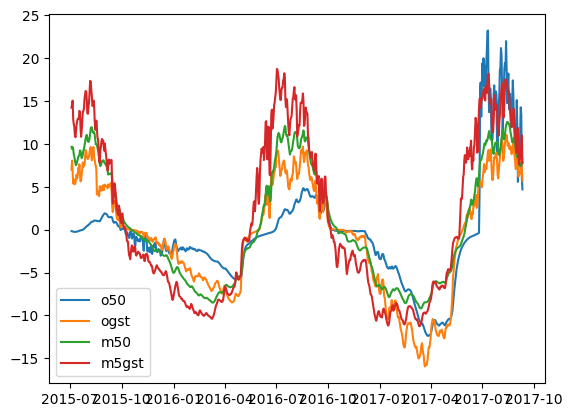